In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import community as louvain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data\PaySim.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
print(df.shape)
df.isnull().sum()

(6362620, 11)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [6]:
print(f"% fraud count = {fraud_counts[1]/(fraud_counts[0]+fraud_counts[1]) * 100}")

% fraud count = 0.12908204481801522


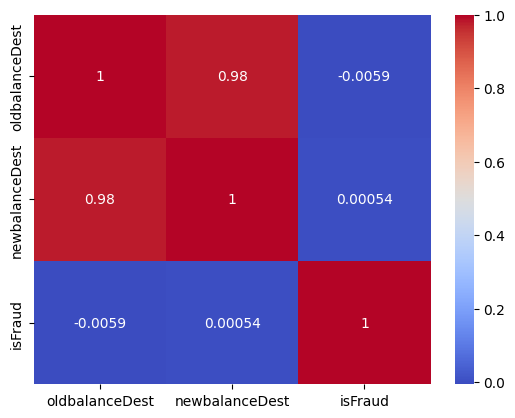

In [7]:
correlation_matrix = df[['oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
processed_df = df.copy()
processed_df['balanceDiffOrig'] = processed_df['newbalanceOrig'] - processed_df['oldbalanceOrg']
processed_df['balanceDiffDest'] = processed_df['newbalanceDest'] - processed_df['oldbalanceDest']
processed_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-5337.77,-1549.21


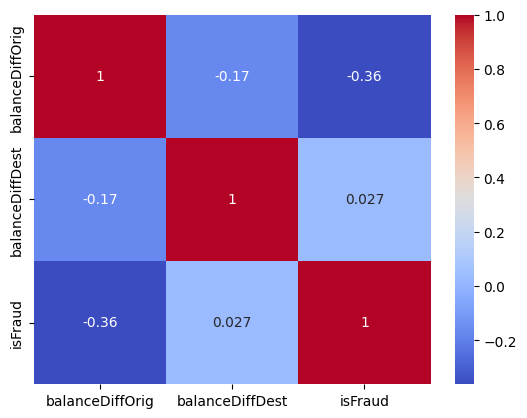

In [9]:
correlation_matrix = processed_df[['balanceDiffOrig', 'balanceDiffDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
processed_df.drop(columns=['balanceDiffDest', 'oldbalanceDest', 'newbalanceDest'], inplace=True)
processed_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0,0,-9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0,0,-1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,1,0,-181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,1,0,-181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0,0,-11668.14


In [11]:
import os
from dotenv import load_dotenv

load_dotenv()

# Neo4j Connection
NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USER = os.getenv("NEO4J_USER")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

In [25]:
from py2neo import Graph, Node, Relationship, NodeMatcher

def connectToNeo4j():
    try:
        graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        print("Connected to Neo4j database")
        return graph
    except Exception as e:
        print(f"Failed to connect: {e}")
        return None

In [26]:
graph = connectToNeo4j()
print(graph)

Connected to Neo4j database
Graph('bolt://localhost:7687')


In [27]:
# graph = connectToNeo4j()
result = graph.run("SHOW DATABASES").data()
print(result)

[{'name': 'neo4j', 'type': 'standard', 'aliases': [], 'access': 'read-write', 'address': 'localhost:7687', 'role': 'primary', 'writer': True, 'requestedStatus': 'online', 'currentStatus': 'online', 'statusMessage': '', 'default': True, 'home': True, 'constituents': []}, {'name': 'system', 'type': 'system', 'aliases': [], 'access': 'read-write', 'address': 'localhost:7687', 'role': 'primary', 'writer': True, 'requestedStatus': 'online', 'currentStatus': 'online', 'statusMessage': '', 'default': False, 'home': False, 'constituents': []}]


In [28]:
sample_size = 100000

fraud_df = processed_df[processed_df['isFraud'] == 1].copy()
non_fraud_df = processed_df[processed_df['isFraud'] == 0].sample(n=min(sample_size - len(fraud_df), len(processed_df[processed_df['isFraud'] == 0])), random_state=42)
processed_df = pd.concat([fraud_df, non_fraud_df]).reset_index(drop=True)
print(f"Using sample of {len(df)} transactions ({len(fraud_df)} fraudulent)")
processed_df.head()

Using sample of 6362620 transactions (8213 fraudulent)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,1,0,-181.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,1,0,-181.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,1,0,-2806.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,1,0,-2806.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,1,0,-20128.0


In [29]:
processed_df.head()
print(processed_df.shape)

(100000, 10)


In [30]:
import time
from py2neo.bulk import create_nodes, create_relationships
import tqdm

# Clear database
print("Deleting all previous graphs..")
graph.run("MATCH (n) DETACH DELETE n")
print("Deleted all")

# Create Schema constraints
graph.run("CREATE CONSTRAINT client_id IF NOT EXISTS FOR (c:Client) REQUIRE c.id IS UNIQUE")
graph.run("CREATE CONSTRAINT merchant_id IF NOT EXISTS FOR (m:Merchant) REQUIRE m.id IS UNIQUE")

Deleting all previous graphs..
Deleted all


(No data)

In [38]:
# Create client and merchant nodes
originator_entities = set(processed_df['nameOrig'].unique())
destination_entities = set(processed_df['nameDest'].unique())
all_entities = originator_entities.union(destination_entities)
print(len(originator_entities))
print(len(destination_entities))

99999
93132


In [39]:
client_entities = {entity for entity in all_entities if entity.startswith("C")}
merchant_entities = {entity for entity in all_entities if entity.startswith("M")}

In [40]:
client_data = [
    {
        "id": entity,
        "name": entity,
        "is_originator": entity in originator_entities,
        "is_destination": entity in destination_entities
    } for entity in client_entities
]

merchant_data = [
    {
        "id": entity,
        "name": entity,
        "is_originator": entity in originator_entities,
        "is_destination": entity in destination_entities
    } for entity in merchant_entities
]

In [41]:
# Bulk create client nodes
batch_size = 500
for i in range(0, len(client_data), batch_size):
    batch = client_data[i:i+batch_size]
    create_nodes(graph.auto(), batch, labels={"Client"})

# Bulk create merchant nodes
for i in range(0, len(merchant_data), batch_size):
    batch = merchant_data[i:i+batch_size]
    create_nodes(graph.auto(), batch, labels={"Merchant"})

In [42]:
# 2. Create transaction edges directly between entities
print("Creating transaction edges...")

# Process in batches to avoid memory issues
batch_size = 1000
total_batches = (len(df) + batch_size - 1) // batch_size
print(total_batches)

Creating transaction edges...
6363


In [43]:
for batch_idx in tqdm.tqdm(range(total_batches)):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]
        
        # Use Cypher for batch transaction creation
        tx_data = []
        for idx, row in batch_df.iterrows():
            source_id = row['nameOrig']
            target_id = row['nameDest']
            
            tx_data.append({
                "from_id": source_id,
                "to_id": target_id,
                "from_type": "Client" if source_id.startswith("C") else "Merchant",
                "to_type": "Client" if target_id.startswith("C") else "Merchant",
                "tx_id": int(idx),
                "step": int(row['step']),
                "type": row['type'],
                "amount": float(row['amount']),
                "is_fraud": bool(row['isFraud']),
                "is_flagged_fraud": bool(row['isFlaggedFraud']),
                "orig_old_balance": float(row['oldbalanceOrg']),
                "orig_new_balance": float(row['newbalanceOrig']),
                "balanceDiffOrig": float(row['balanceDiffOrig']) if 'balanceDiffOrig' in row else float(row['newbalanceOrig']) - float(row['oldbalanceOrg'])
                # Removed the dest balance fields that were removed from the dataset
            })
        
        # Process in smaller chunks for the transaction edges
        tx_batch_size = 200
        for i in range(0, len(tx_data), tx_batch_size):
            tx_batch = tx_data[i:i+tx_batch_size]
            
            # Use a parameterized Cypher query for creating edges in batches
            # Modified to handle both Client and Merchant node types and removed the deleted fields
            query = """
            UNWIND $transactions AS tx
            MATCH (from:`${fromType}` {id: tx.from_id})
            MATCH (to:`${toType}` {id: tx.to_id})
            CREATE (from)-[r:TRANSACTION {
                tx_id: tx.tx_id,
                step: tx.step,
                type: tx.type,
                amount: tx.amount,
                is_fraud: tx.is_fraud,
                is_flagged_fraud: tx.is_flagged_fraud,
                orig_old_balance: tx.orig_old_balance,
                orig_new_balance: tx.orig_new_balance,
                orig_balance_diff: tx.balanceDiffOrig,
                timestamp: datetime({epochmillis: tx.step * 3600000})
            }]->(to)
            """
            
            for tx in tx_batch:
                # Execute for each transaction with the correct node types
                graph.run(
                    query.replace("${fromType}", tx["from_type"]).replace("${toType}", tx["to_type"]),
                    parameters={"transactions": [tx]}
                )

100%|██████████| 6363/6363 [10:08:02<00:00,  5.73s/it]      


In [44]:
# Create aggregate relationships (optional but useful)
print("Creating aggregate relationships...")

# This creates TRANSFERS_TO relationships that summarize all transactions between entity pairs
graph.run("""
MATCH (e1)-[t:TRANSACTION]->(e2)
WITH e1, e2, 
        collect(t) as transactions,
        sum(t.amount) as total_amount,
        count(t) as tx_count,
        sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as fraud_count
MERGE (e1)-[r:TRANSFERS_TO]->(e2)
SET r.tx_count = tx_count,
    r.total_amount = total_amount,
    r.fraud_count = fraud_count,
    r.fraud_ratio = toFloat(fraud_count) / tx_count,
    r.avg_amount = total_amount / tx_count
""")

Creating aggregate relationships...


(No data)

In [45]:
# Update entity nodes with aggregate metrics - for both Client and Merchant nodes
print("Calculating entity metrics...")

# Calculate transaction counts, fraud counts, etc. for each entity
graph.run("""
MATCH (e)
WHERE e:Client OR e:Merchant
OPTIONAL MATCH (e)-[t:TRANSACTION]->()
WITH e, count(t) as outgoing_count, 
        sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as outgoing_fraud_count,
        sum(t.amount) as outgoing_total
OPTIONAL MATCH ()-[t2:TRANSACTION]->(e)
WITH e, outgoing_count, outgoing_fraud_count, outgoing_total,
        count(t2) as incoming_count,
        sum(CASE WHEN t2.is_fraud THEN 1 ELSE 0 END) as incoming_fraud_count,
        sum(t2.amount) as incoming_total
SET e.outgoing_tx_count = outgoing_count,
    e.outgoing_fraud_count = outgoing_fraud_count,
    e.outgoing_fraud_ratio = CASE WHEN outgoing_count > 0 THEN toFloat(outgoing_fraud_count) / outgoing_count ELSE 0 END,
    e.outgoing_total = outgoing_total,
    e.incoming_tx_count = incoming_count,
    e.incoming_fraud_count = incoming_fraud_count,
    e.incoming_fraud_ratio = CASE WHEN incoming_count > 0 THEN toFloat(incoming_fraud_count) / incoming_count ELSE 0 END,
    e.incoming_total = incoming_total,
    e.total_tx_count = outgoing_count + incoming_count,
    e.total_fraud_count = outgoing_fraud_count + incoming_fraud_count,
    e.total_fraud_ratio = CASE WHEN (outgoing_count + incoming_count) > 0 
                            THEN toFloat(outgoing_fraud_count + incoming_fraud_count) / (outgoing_count + incoming_count) 
                            ELSE 0 END
""")

Calculating entity metrics...


(No data)

In [48]:
stats = {
        "client_count": len(client_entities),
        "merchant_count": len(merchant_entities),
        "total_entity_count": len(all_entities),
        "transaction_count": len(processed_df)
    }

print(stats)

{'client_count': 161843, 'merchant_count': 31284, 'total_entity_count': 193127, 'transaction_count': 100000}


In [51]:
from py2neo import Graph

# Connect to your existing Neo4j database
graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

In [52]:
# Check basic graph statistics
entity_count = graph.run("MATCH (n) RETURN count(n) as count").data()#[0]['count']
relationship_count = graph.run("MATCH ()-[r]->() RETURN count(r) as count").data()#[0]['count']

print(f"Graph contains {entity_count} entities and {relationship_count} relationships")

Graph contains [{'count': 193127}] entities and [{'count': 200138}] relationships
